In [4]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import sys

In [5]:
def stockchart(symbol):
    ts = TimeSeries(key='your_key', output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=symbol,interval='1min', outputsize='full')
    print(data)
    data['4. close'].plot()
    plt.title('Stock chart')
    plt.show()

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2019-01-28 09:31:00  38.2700  38.2700  38.2700   38.2700    45354.0
2019-01-28 09:32:00  38.3050  38.3050  38.3050   38.3050     7651.0
2019-01-28 09:33:00  38.2950  38.3000  38.2850   38.3000    14015.0
2019-01-28 09:35:00  38.3100  38.3400  38.3100   38.3400     6536.0
2019-01-28 09:36:00  38.3500  38.3500  38.3500   38.3500     4319.0
2019-01-28 09:37:00  38.3500  38.3500  38.3500   38.3500     3780.0
2019-01-28 09:38:00  38.3600  38.3600  38.3600   38.3600      820.0
2019-01-28 09:39:00  38.3200  38.3200  38.3200   38.3200     2688.0
2019-01-28 09:40:00  38.3364  38.3364  38.3364   38.3364     3001.0
2019-01-28 09:41:00  38.3100  38.3100  38.3100   38.3100     2825.0
2019-01-28 09:42:00  38.3500  38.3500  38.3500   38.3500    10141.0
2019-01-28 09:43:00  38.3500  38.3800  38.3500   38.3800    11135.0
2019-01-28 09:45:00  38.3600  38.3650  38.3600  

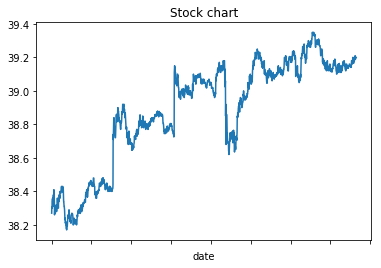

In [6]:
symbol="GSK"
stockchart(symbol)